In [1]:
# Import libraries
#pandas = handles tabular data (like Excel sheets).

#numpy = handles numbers and arrays.

#fetch_california_housing = gets the dataset.

#StandardScaler = helps scale values like prices and areas.

#matplotlib, seaborn = draw charts.
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
#We load the California housing data.

#It's stored in data.data (features) and data.target (house prices).

#We put all of it into a DataFrame to make it easier to work with.

#We add the prices as a new column named 'Target'.
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
df.shape

(20640, 9)

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [9]:
#Some columns like house age, rooms, etc. may have different scales.

#Example: Age is between 1-50, but income could be between 0-15.

#Some models (like SVR or Gradient Boosting) work better when all numbers are on the same scale.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Target', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled['Target'] = df['Target']


In [11]:
#X: All the input features (like rooms, age, etc.)

#y: The price (Target column)

#We split it into training data (80%) and testing data (20%) so we can test our models after training.
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Target', axis=1)
y = df_scaled['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f}")
    print(f"  R2 Score: {r2:.4f}\n")
    
    return {'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2}

#This function:

#Trains the model on training data.

#Predicts on test data.

#Calculates:

#MSE: average squared error.

#MAE: average of absolute errors.

#R²: how well the model explains the variation in prices.

#Prints and returns these metrics so we can compare later


In [17]:
results = []


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
results.append(evaluate_model("Linear Regression", lr))


Linear Regression Results:
  Mean Squared Error: 0.5559
  Mean Absolute Error: 0.5332
  R2 Score: 0.5758



In [15]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
results.append(evaluate_model("Decision Tree", dt))


Decision Tree Results:
  Mean Squared Error: 0.4943
  Mean Absolute Error: 0.4538
  R2 Score: 0.6228



In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
results.append(evaluate_model("Random Forest", rf))


Random Forest Results:
  Mean Squared Error: 0.2555
  Mean Absolute Error: 0.3276
  R2 Score: 0.8050



In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
results.append(evaluate_model("Gradient Boosting", gb))

#Gradient Boosting builds trees one-by-one, each one learning from the previous tree’s mistakes.

Gradient Boosting Results:
  Mean Squared Error: 0.2940
  Mean Absolute Error: 0.3717
  R2 Score: 0.7756



In [21]:
#SVR fits a smooth curve and tries to keep predictions within a margin of error. It's sensitive to feature scaling.
from sklearn.svm import SVR
svr = SVR()
results.append(evaluate_model("Support Vector Regressor", svr))


Support Vector Regressor Results:
  Mean Squared Error: 0.3552
  Mean Absolute Error: 0.3978
  R2 Score: 0.7289



In [22]:
result_df = pd.DataFrame(results)
result_df.sort_values('R2', ascending=False)


,Model,MSE,MAE,R2
1,Random Forest,0.255498,0.327613,0.805024
2,Gradient Boosting,0.293999,0.371650,0.775643
3,Support Vector Regressor,0.355198,0.397763,0.728941
0,Linear Regression,0.555892,0.533200,0.575788


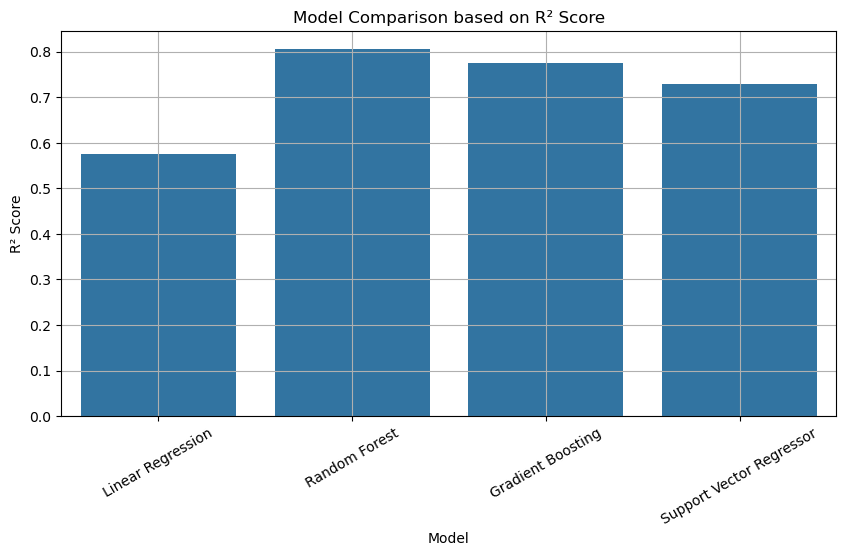

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(data=result_df, x='Model', y='R2')
plt.title('Model Comparison based on R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

#This draws a simple bar chart showing which model had the highest R² (most accurate).